In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from data_preprocessing import preprocess_data
from data_loading import load_data
from models import cross_val_pr_curve,tune_hyperparameters

In [2]:
train_data_path="D:/Pycharm/AutoLoanModel/Training Dataset.csv"
test_data_path="D:/Pycharm/AutoLoanModel/Testing Dataset.csv"
df_train, df_test = load_data(train_data_path,test_data_path)
X_train_processed, y_train, X_test_processed, y_test=preprocess_data(df_train, df_test)

In [3]:
# Initialize individual classifiers

best_params_rf={'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2\
                , 'n_estimators': 300}
best_params_xgb={'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, \
                 'scale_pos_weight': 0.3544383149448345, 'subsample': 0.7}

rf_clf_ensemble = RandomForestClassifier(**best_params_rf)

xgb_clf_ensemble = xgb.XGBClassifier(**best_params_xgb)

# Create an ensemble using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('rf', rf_clf_ensemble), ('xgb', xgb_clf_ensemble)], 
    voting='soft'  # 'hard' for majority vote; 'soft' uses probabilities
)

# Fit the ensemble model on training data
ensemble_clf.fit(X_train_processed, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [4]:
from models import evaluate_models
evaluate_models(ensemble_clf, X_train_processed, y_train,'average_precision')

Cross-Validation Precision Scores: [0.94144304 0.94212265 0.94126186]
Mean Precision Score: 0.9416091848935557
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      5654
           1       0.88      0.92      0.90     15952

    accuracy                           0.85     21606
   macro avg       0.82      0.79      0.80     21606
weighted avg       0.85      0.85      0.85     21606



NameError: name 'auc_scores' is not defined

**Feature Importance Using Permuatiuon**


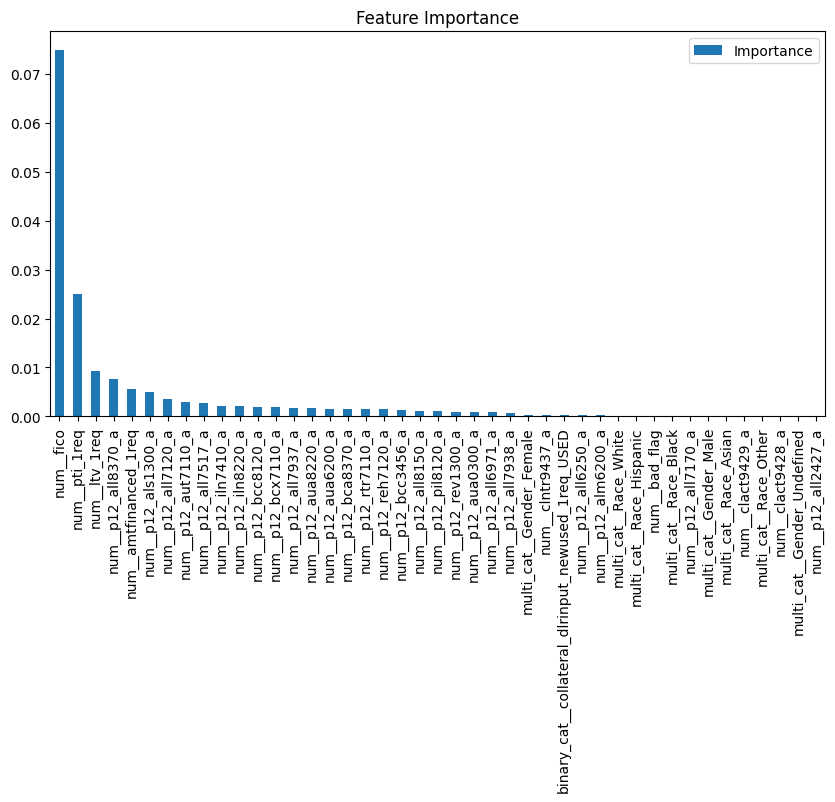

In [6]:
from models import feature_importance
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
feature_importance(xgb_model, X_train_processed, y_train,'average_precision')